In [1]:
import numpy as np 
import pandas as pd

In [2]:
df=pd.read_csv('./datasets/Delhi_rent.csv')
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1.0,RK,Studio Apartment,Vasant Kunj,"9,999",500.0,Furnished,1 bathrooms
1,OWNER,1.0,BHK,Apartment,Sector-B Vasant Kunj,"18,500",750.0,Semi-Furnished,1 bathrooms
2,OWNER,2.0,BHK,Apartment,Saket,"13,000",1050.0,Semi-Furnished,2 bathrooms
3,OWNER,1.0,BHK,Apartment,New Ashok Nagar,"10,000",550.0,Furnished,1 bathrooms
4,OWNER,2.0,BHK,Independent Floor,laxmi nagar,"13,500",648.0,Furnished,1 bathrooms


In [3]:
df.drop(columns=['seller_type','layout_type','bathroom'],inplace=True)
df.head()

,bedroom,property_type,locality,price,area,furnish_type
0,1.0,Studio Apartment,Vasant Kunj,"9,999",500.0,Furnished
1,1.0,Apartment,Sector-B Vasant Kunj,"18,500",750.0,Semi-Furnished
2,2.0,Apartment,Saket,"13,000",1050.0,Semi-Furnished
3,1.0,Apartment,New Ashok Nagar,"10,000",550.0,Furnished
4,2.0,Independent Floor,laxmi nagar,"13,500",648.0,Furnished


In [4]:
df.shape

(33500, 6)

In [5]:
df.isnull().sum()

bedroom          500
property_type    500
locality         500
price            500
area             500
furnish_type     500
dtype: int64

In [6]:
df['price'] = df['price'].str.replace(r'[^\d.]+', '', regex=True)

In [7]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [8]:
df.head()

,bedroom,property_type,locality,price,area,furnish_type
0,1.0,Studio Apartment,Vasant Kunj,9999.0,500.0,Furnished
1,1.0,Apartment,Sector-B Vasant Kunj,18500.0,750.0,Semi-Furnished
2,2.0,Apartment,Saket,13000.0,1050.0,Semi-Furnished
3,1.0,Apartment,New Ashok Nagar,10000.0,550.0,Furnished
4,2.0,Independent Floor,laxmi nagar,13500.0,648.0,Furnished


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33500 entries, 0 to 33499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedroom        33000 non-null  float64
 1   property_type  33000 non-null  object 
 2   locality       33000 non-null  object 
 3   price          33000 non-null  float64
 4   area           33000 non-null  float64
 5   furnish_type   33000 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.5+ MB


In [10]:
df["house_price"] = (df["price"] * 12 * 100) / 3

In [11]:
df.head()

,bedroom,property_type,locality,price,area,furnish_type,house_price
0,1.0,Studio Apartment,Vasant Kunj,9999.0,500.0,Furnished,3999600.0
1,1.0,Apartment,Sector-B Vasant Kunj,18500.0,750.0,Semi-Furnished,7400000.0
2,2.0,Apartment,Saket,13000.0,1050.0,Semi-Furnished,5200000.0
3,1.0,Apartment,New Ashok Nagar,10000.0,550.0,Furnished,4000000.0
4,2.0,Independent Floor,laxmi nagar,13500.0,648.0,Furnished,5400000.0


In [12]:
df.bedroom.value_counts()

bedroom
3.0     10304
2.0      8478
1.0      7292
4.0      5894
5.0       828
6.0        50
10.0       46
7.0        32
8.0        30
15.0       18
9.0        17
12.0        5
14.0        4
11.0        2
Name: count, dtype: int64

In [13]:
df = df[df['bedroom'] <= 5]

In [14]:
df.property_type.value_counts()

property_type
Independent Floor    19131
Apartment             8599
Studio Apartment      1974
Independent House     1732
Villa                 1269
Penthouse               91
Name: count, dtype: int64

In [15]:
df["property_type"] = df["property_type"].replace("Studio Apartment", "Apartment")
df["property_type"] = df["property_type"].replace("Independent Floor", "Villa")
df["property_type"] = df["property_type"].replace("Penthouse", "Villa")

In [16]:
df.head()

,bedroom,property_type,locality,price,area,furnish_type,house_price
0,1.0,Apartment,Vasant Kunj,9999.0,500.0,Furnished,3999600.0
1,1.0,Apartment,Sector-B Vasant Kunj,18500.0,750.0,Semi-Furnished,7400000.0
2,2.0,Apartment,Saket,13000.0,1050.0,Semi-Furnished,5200000.0
3,1.0,Apartment,New Ashok Nagar,10000.0,550.0,Furnished,4000000.0
4,2.0,Villa,laxmi nagar,13500.0,648.0,Furnished,5400000.0


In [17]:
df.locality.value_counts().describe()

count     662.000000
mean       49.540785
std       147.588505
min         1.000000
25%         1.000000
50%         4.000000
75%        20.000000
max      2164.000000
Name: count, dtype: float64

In [18]:
locality_counts = df["locality"].value_counts()
df = df[df["locality"].isin(locality_counts[locality_counts >=10].index)]

In [19]:
df.locality.nunique()

227

In [20]:
df.shape

(31557, 7)

In [21]:
df.furnish_type.value_counts()

furnish_type
Semi-Furnished    15735
Unfurnished        9737
Furnished          6085
Name: count, dtype: int64

In [22]:
df["furnish_type"] = df["furnish_type"].replace("Semi-Furnished", "Furnished")

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x800 with 0 Axes>

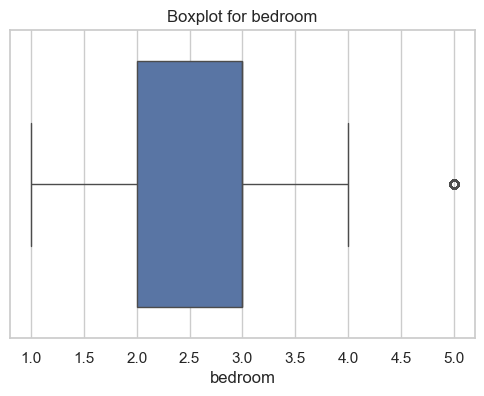

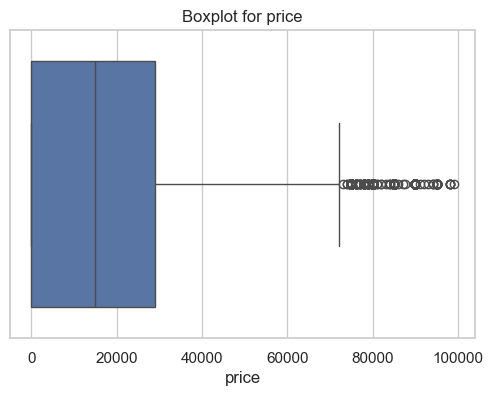

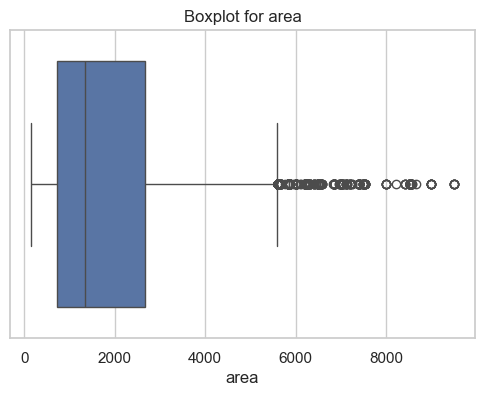

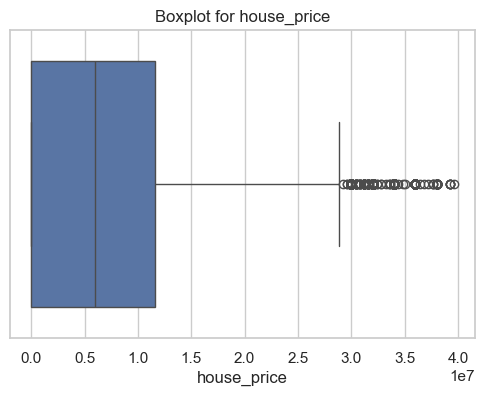

In [24]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

df_numeric = df.select_dtypes(include=['float64', 'int64'])  
for column in df_numeric.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [25]:
for column in df_numeric.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [26]:
df.shape

(25714, 7)

In [27]:
df.drop(columns=['price'],inplace=True)

In [28]:
df.rename(columns={'house_price': 'price'}, inplace=True)

In [29]:
df.head()

,bedroom,property_type,locality,area,furnish_type,price
0,1.0,Apartment,Vasant Kunj,500.0,Furnished,3999600.0
1,1.0,Apartment,Sector-B Vasant Kunj,750.0,Furnished,7400000.0
2,2.0,Apartment,Saket,1050.0,Furnished,5200000.0
3,1.0,Apartment,New Ashok Nagar,550.0,Furnished,4000000.0
4,2.0,Villa,laxmi nagar,648.0,Furnished,5400000.0


In [30]:
df = pd.get_dummies(df).astype(int)

In [31]:
df['price'] = df['price'] / 100000

In [32]:
df.head()

,bedroom,area,price,property_type_Apartment,property_type_Independent House,property_type_Villa,locality_AGCR Enclave,locality_Abul Fazal Enclave Jamia Nagar,locality_Alaknanda,locality_Anand Niketan,...,locality_dwarka sector 17,locality_greater kailash Enclave 1,locality_i p extension patparganj,locality_laxmi nagar,locality_laxmi nagar near metro station,locality_mayur vihar phase 1,locality_rohini sector 5,locality_vikaspuri,furnish_type_Furnished,furnish_type_Unfurnished
0,1,500,39.996,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,750,74.000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1050,52.000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,550,40.000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,648,54.000,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [33]:
df.shape

(25714, 233)

In [34]:
df.head()

,bedroom,area,price,property_type_Apartment,property_type_Independent House,property_type_Villa,locality_AGCR Enclave,locality_Abul Fazal Enclave Jamia Nagar,locality_Alaknanda,locality_Anand Niketan,...,locality_dwarka sector 17,locality_greater kailash Enclave 1,locality_i p extension patparganj,locality_laxmi nagar,locality_laxmi nagar near metro station,locality_mayur vihar phase 1,locality_rohini sector 5,locality_vikaspuri,furnish_type_Furnished,furnish_type_Unfurnished
0,1,500,39.996,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,750,74.000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1050,52.000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,550,40.000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,648,54.000,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
target=df.price
df.drop(columns=['price'],inplace=True)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,target,test_size=0.2,random_state=10)

In [37]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.47243366586094604

In [38]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), df,target, cv=cv)

array([0.45786151, 0.46027564, 0.48044429, 0.46417651, 0.44606842])

In [39]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1, 10],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model_using_gridsearchcv(df,target)

,model,best_score,best_params
0,linear_regression,0.461765,{'fit_intercept': True}
1,lasso,0.383590,"{'alpha': 0.1, 'selection': 'random'}"
2,decision_tree,0.784550,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [41]:
model=DecisionTreeRegressor(criterion= 'friedman_mse',splitter='random')
model.fit(df,target)
model.score(X_test, y_test)

0.9348717019167576

In [43]:
import pickle
with open('Delhi_model.pickle','wb') as f:
    pickle.dump(model,f)

In [45]:
import json
columns = {
    'data_columns' : [col.lower() for col in df.columns]
}
with open("Delhi_columns.json","w") as f:
    f.write(json.dumps(columns))